In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# Date: March 2024

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Credit Card Dataset

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
y.value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Train a Logitsic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
train_accuracy = model.score(X_train, y_train)
print(f'Train accuracy: {train_accuracy * 100:.2f}%')

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Train accuracy: 99.92%
Test accuracy: 99.91%


Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_train)
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)

[[213202     34]
 [   133    236]]


In [10]:
236 / (236 + 133)

0.6395663956639567

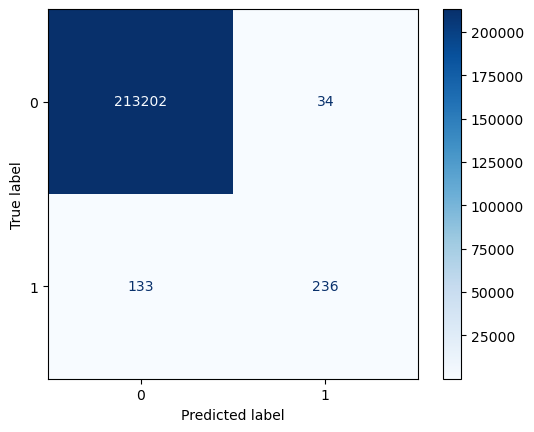

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap='Blues')
plt.savefig('figures/confusion_matrix.pdf')

Precision and Recall

In [12]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_train, y_pred)
print(f'Recall: {recall * 100:.2f}%')

Precision: 87.41%
Recall: 63.96%


In [13]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred)
print(f'F1 score: {f1 * 100:.2f}%')

F1 score: 73.87%


In [14]:
y_test_pred = model.predict(X_test)

precision = precision_score(y_test, y_test_pred)
print(f'Test Precision: {precision * 100:.2f}%')

recall = recall_score(y_test, y_test_pred)
print(f'Test Recall: {recall * 100:.2f}%')

f1 = f1_score(y_test, y_test_pred)
print(f'Test F1 score: {f1 * 100:.2f}%')

Test Precision: 83.52%
Test Recall: 61.79%
Test F1 score: 71.03%


Thresholding

In [15]:
threshold = -1.0
scores = model.decision_function(X_train)
new_y_pred = (scores > threshold)

In [16]:
precision = precision_score(y_train, new_y_pred)
print(f'Precision: {precision * 100:.2f}%')

recall = recall_score(y_train, new_y_pred)
print(f'Recall: {recall * 100:.2f}%')

Precision: 82.97%
Recall: 71.27%


Precision-Recall Curve

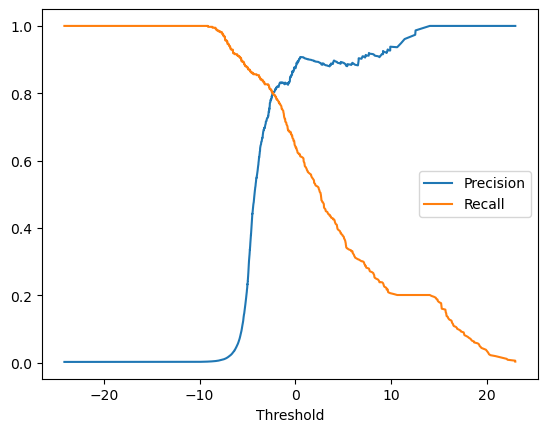

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, scores)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.savefig('figures/precision_recall_curve.pdf')

In [18]:
threshold = thresholds[np.where(recalls > 0.75)][-1]
print(f'Threshold for recall 75%: {threshold:.3f}')

Threshold for recall 75%: -1.355


In [19]:
precision = precision_score(y_train, scores > threshold)
print(f'Precision: {precision * 100:.2f}%')

Precision: 83.13%


ROC Curve

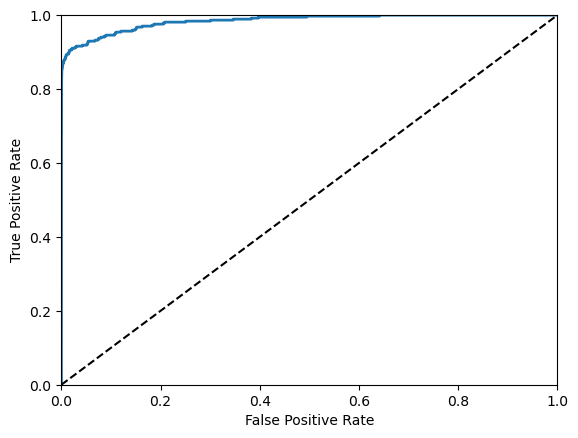

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, scores)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('figures/roc_curve.pdf')

In [21]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, scores)
print(f'AUC: {auc:.4f}')

AUC: 0.9843
